In [6]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
M=nx.read_gml("polblogs.gml", relabel=True)

In [8]:
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

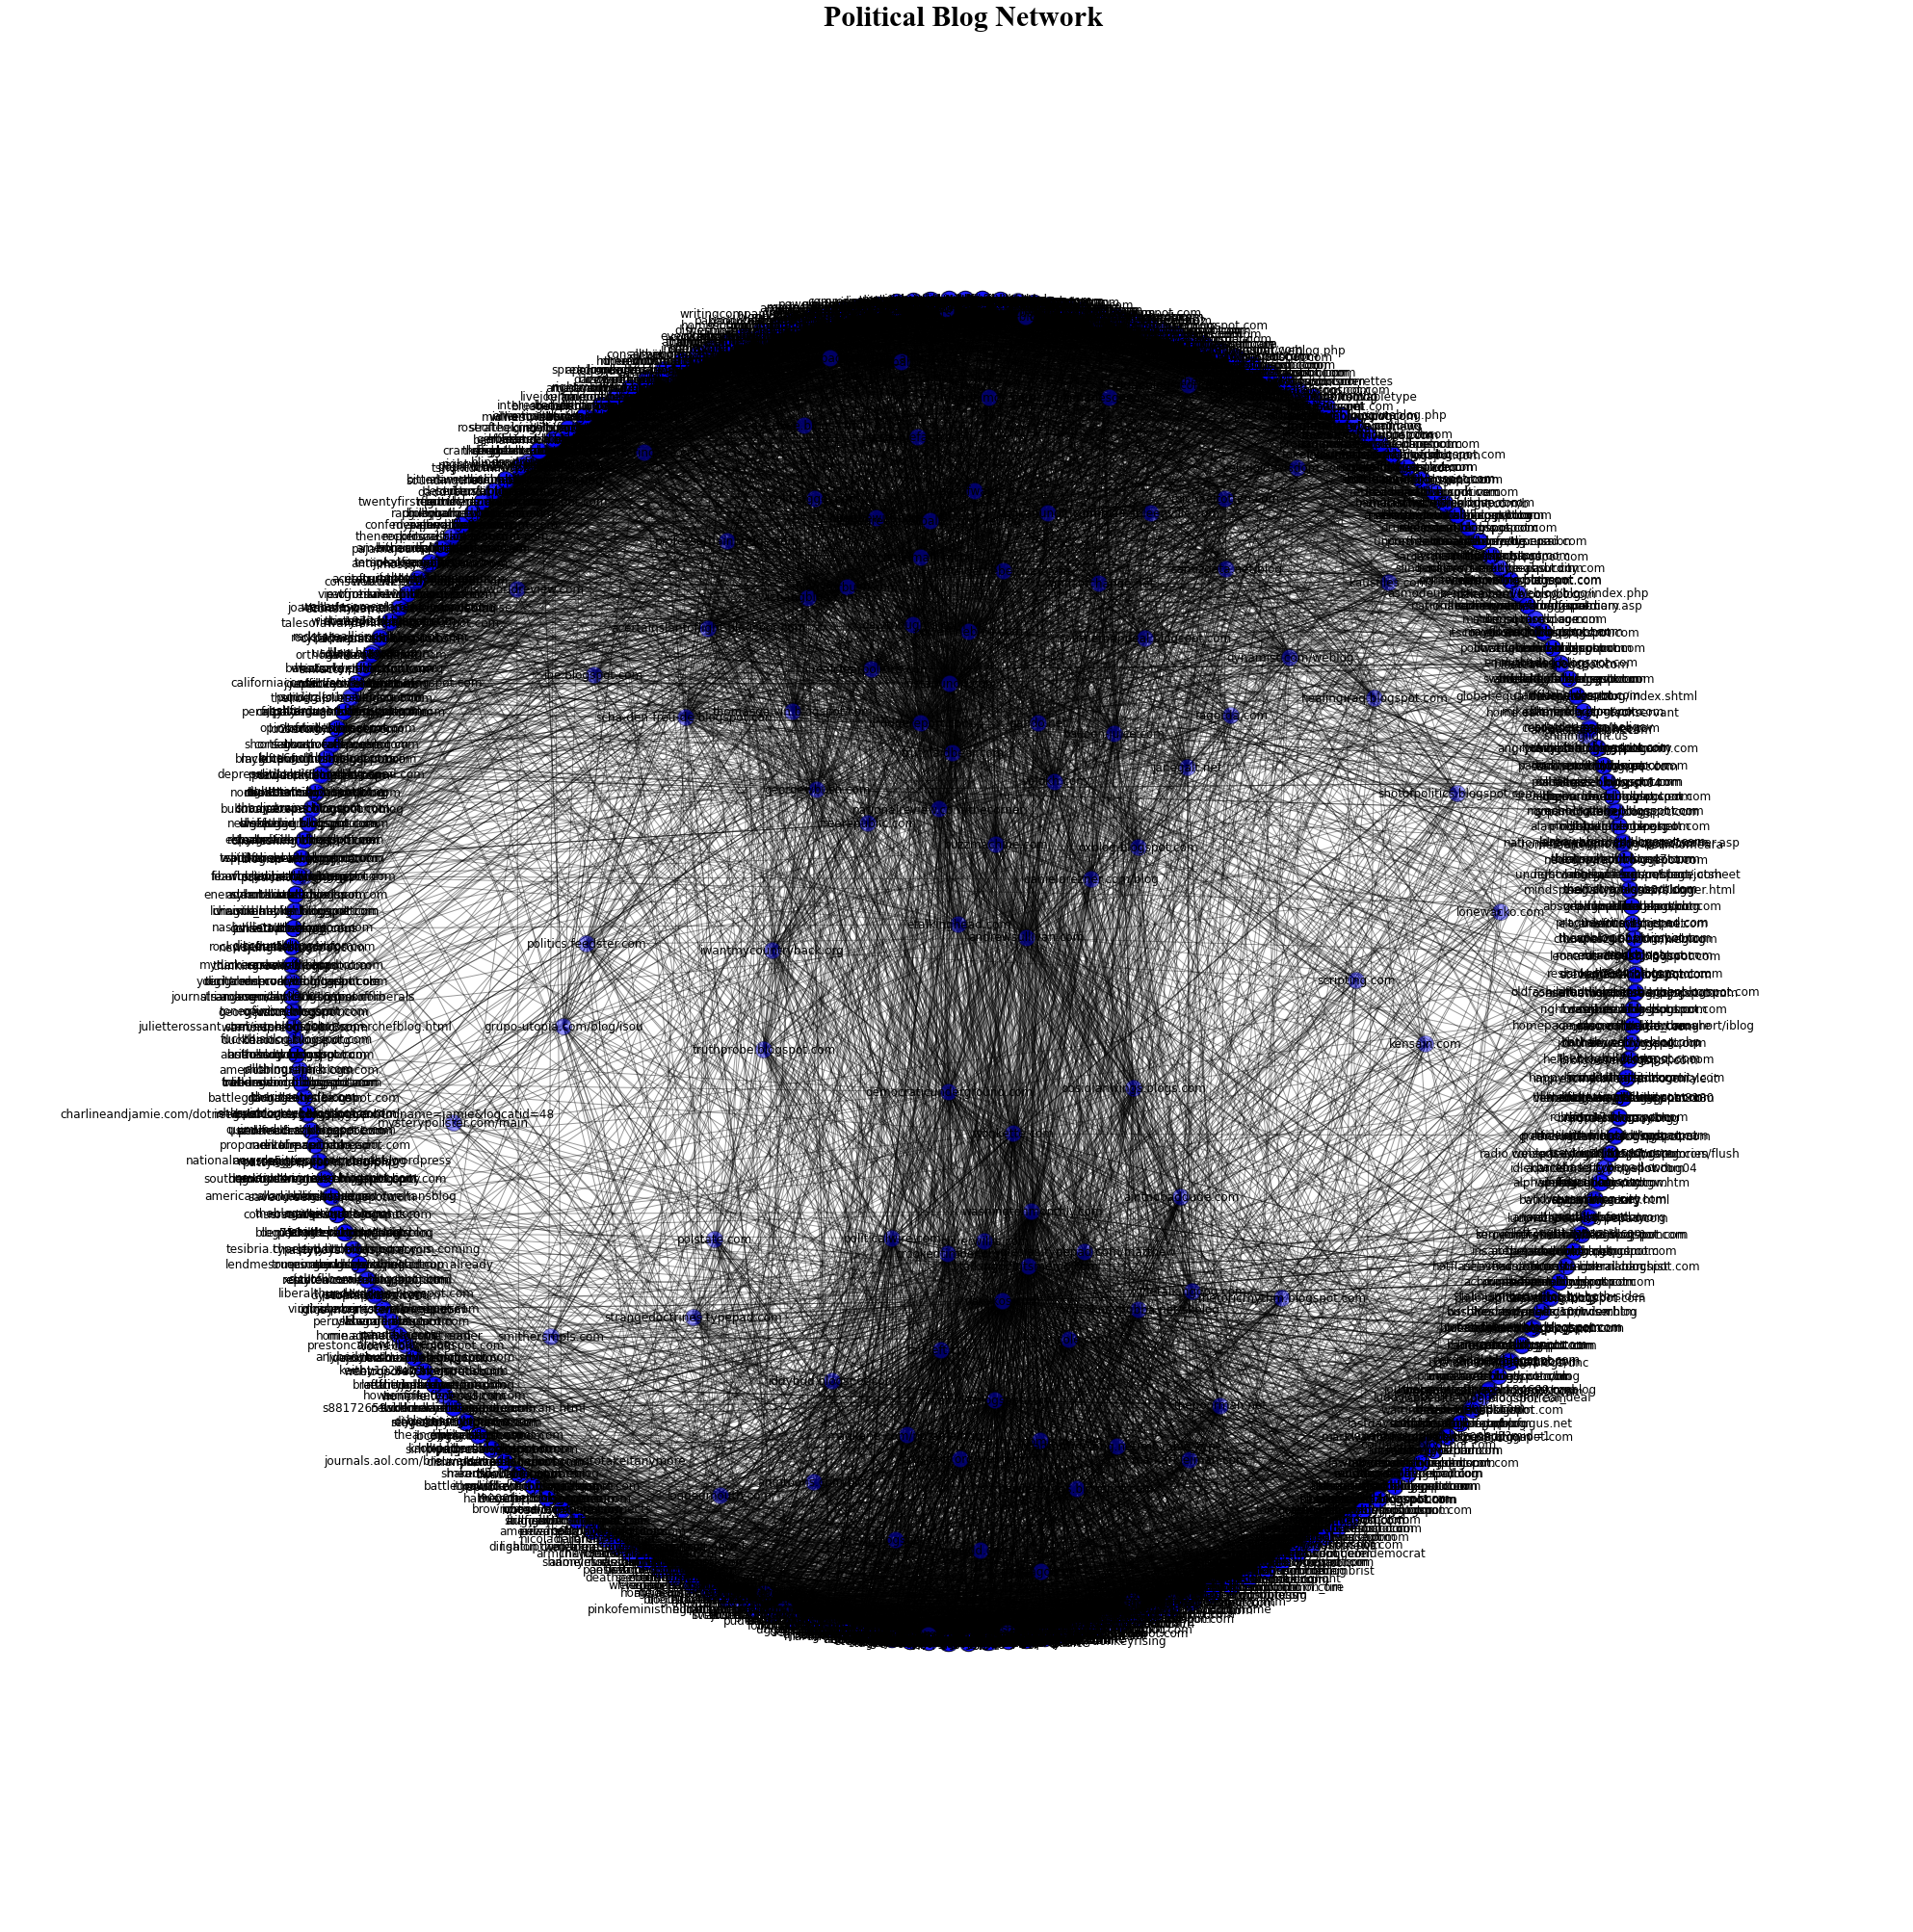

In [9]:
plt.figure(figsize=(35,35))
pos=nx.spring_layout(G, iterations=600, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Times New Roman',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political Blog Network", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [10]:
centrality= nx.eigenvector_centrality_numpy(G)

In [11]:
List = []
for node in centrality:
    List.append((node,centrality[node]))

In [12]:
sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
print "the ten most influential blogs are:"
sorted_list_desc[0:10]

the ten most influential blogs are:


[(u'atrios.blogspot.com', 0.19482295898856747),
 (u'dailykos.com', 0.16090716385818693),
 (u'washingtonmonthly.com', 0.14654050463836465),
 (u'digbysblog.blogspot.com', 0.14265582251978642),
 (u'bodyandsoul.typepad.com', 0.14114853531288896),
 (u'liberaloasis.com', 0.13953785666658575),
 (u'tbogg.blogspot.com', 0.13704857535546836),
 (u'corrente.blogspot.com', 0.12943073134224972),
 (u'talkingpointsmemo.com', 0.12700931078294148),
 (u'dneiwert.blogspot.com', 0.12238703900638004)]

In [13]:
sorted_list_asc=sorted(List, key=lambda x: x[1])
print "the ten least influential blogs are:"
sorted_list_asc[0:10]

the ten least influential blogs are:


[(u'digital-democrat.blogspot.com', -1.2024941538969542e-18),
 (u'thelonedem.com', 7.47434350281782e-19),
 (u'americanworldview.tripod.com/weltansblog', 7.489792407464297e-09),
 (u'quimundus.modblog.com', 6.675725344820911e-08),
 (u'batr.org/commentary.html', 6.794245454781243e-07),
 (u'batr.net', 6.795053204377665e-07),
 (u'democratvoice.org', 1.022160231722688e-06),
 (u'quimundus.squarespace.com', 6.0564974874414476e-06),
 (u'massachusetts-liberal.com', 9.48471174661123e-06),
 (u'thingsasitis.net', 1.1737028626600218e-05)]

In [14]:
color_list=[]
GL=nx.Graph()
GR=nx.Graph()
node=M.nodes(data=True)
for i in range(0, M.number_of_nodes(), 1):
    if node[i][1]['value'] == 1:
        color_list.append('g')
        GR.add_node(node[i][0])
    else:
        color_list.append('b')
        GL.add_node(node[i][0])

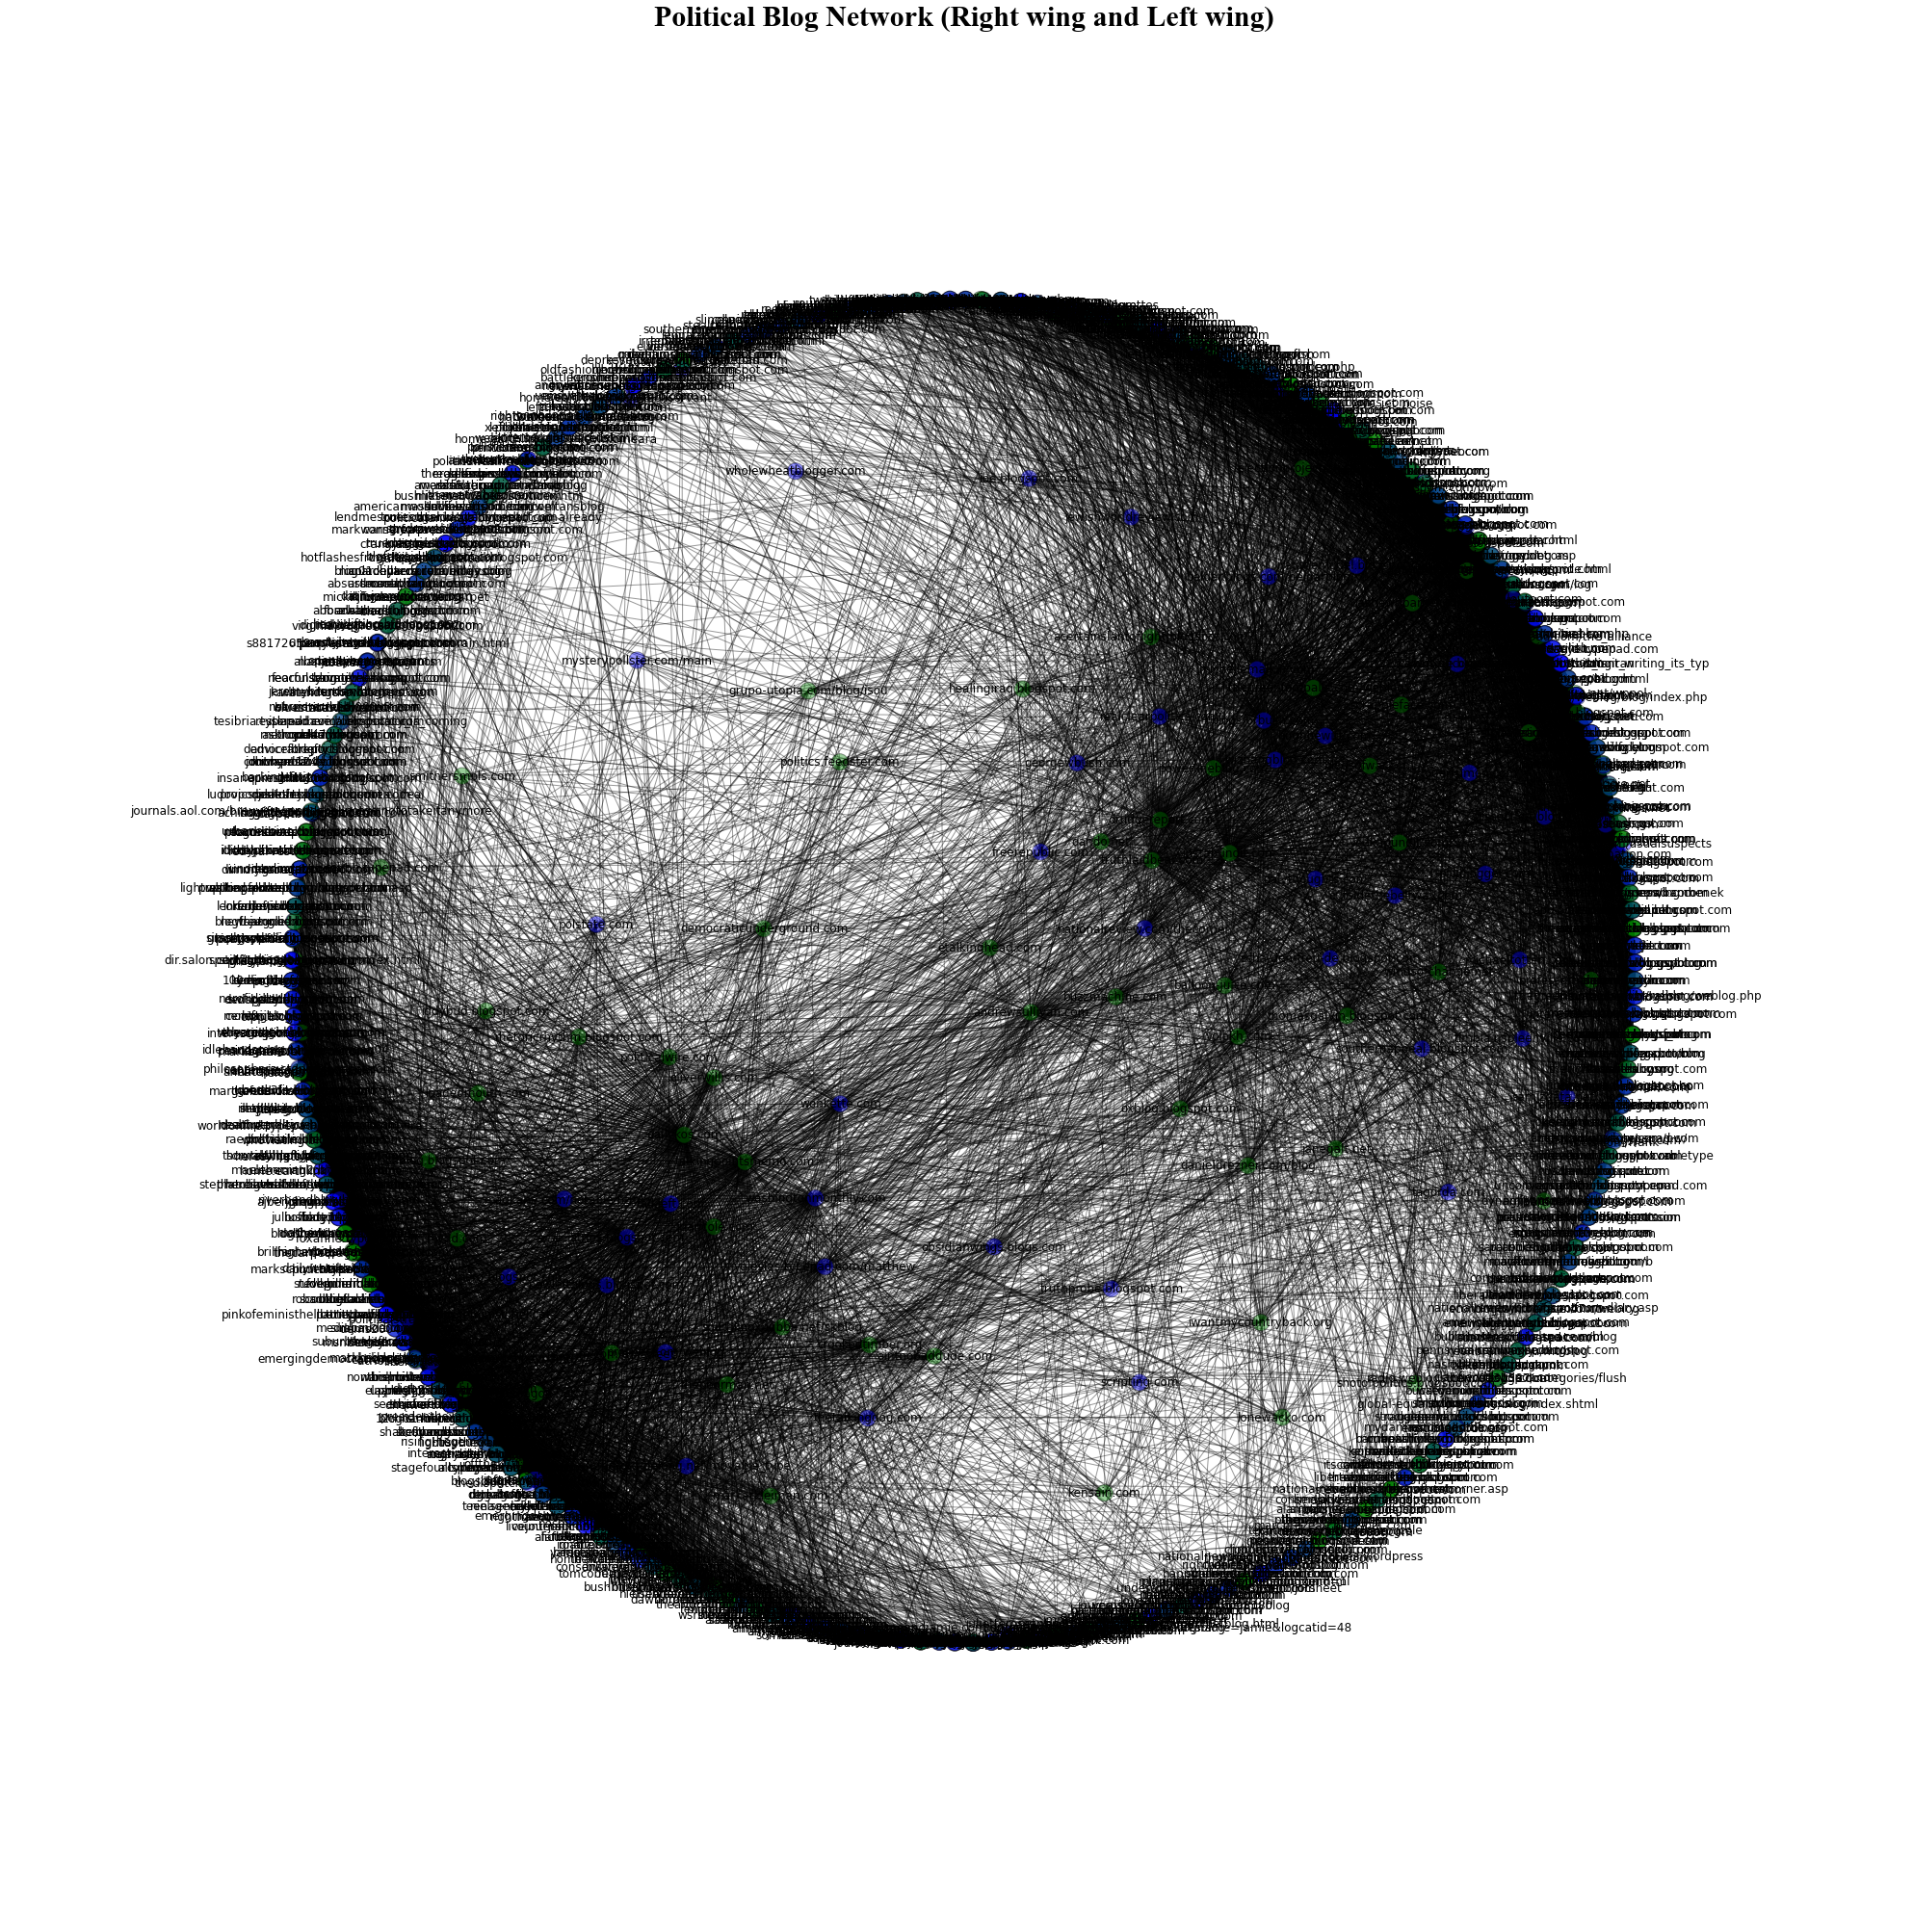

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35,35))
pos=nx.spring_layout(G, iterations=600, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Times New Roman',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political Blog Network (Right wing and Left wing)", font)

nx.draw_networkx_nodes(G,pos,node_color=color_list,alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [16]:
for u,v,data in M.edges_iter(data=True):
    if GL.has_node(u) and GL.has_node(v) and GL.has_edge(u,v) :
        GL[u][v]['weight'] += 1
    elif GL.has_node(u) and GL.has_node(v):
        GL.add_edge(u, v, weight=1)
    else:
        continue

In [17]:
for u,v,data in M.edges_iter(data=True):
    if GR.has_node(u) and GR.has_node(v) and GR.has_edge(u,v) :
        GR[u][v]['weight'] += 1
    elif GR.has_node(u) and GR.has_node(v):
        GR.add_edge(u, v, weight=1)
    else:
        continue

In [18]:
centrality_L= nx.eigenvector_centrality_numpy(GL)
centrality_R= nx.eigenvector_centrality_numpy(GR)

In [19]:
def sorting(centrality):
    """
    Takes centality as input.
    Make a list of (node, centrality).
    Sort the List in descending order to get most influential blog at the top.
    Sort the List in ascending order to get least influential blog at the top.
    Returns sorted list(ascending and descending order)
    """
    List = []
    for node in centrality:
        List.append((node,centrality[node]))
    sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
    sorted_list_asc=sorted(List, key=lambda x: x[1])
    return sorted_list_desc, sorted_list_asc

In [20]:
sorted_list_desc_L, sorted_list_asc_L = sorting(centrality_L)
print "The ten most influential left wing blogs are:"
sorted_list_desc_L[0:10]

The ten most influential left wing blogs are:


[(u'atrios.blogspot.com', 0.20959935892096668),
 (u'dailykos.com', 0.16836739525944197),
 (u'bodyandsoul.typepad.com', 0.15679475538395363),
 (u'liberaloasis.com', 0.15611618964885135),
 (u'digbysblog.blogspot.com', 0.15543644564126868),
 (u'tbogg.blogspot.com', 0.15010406230329548),
 (u'corrente.blogspot.com', 0.14485947796783416),
 (u'washingtonmonthly.com', 0.13968072023195272),
 (u'dneiwert.blogspot.com', 0.13474948943266685),
 (u'pandagon.net', 0.13295183425131976)]

In [21]:
print "The ten least influential left wing blogs are:"
sorted_list_asc_L[0:10]

The ten least influential left wing blogs are:


[(u'jason.unitedworkers.org', -4.838907668477141e-18),
 (u'aurelientt.blogspot.com', -4.507344834575703e-18),
 (u'demoliberal.blogspot.com', -4.25424926665245e-18),
 (u'republicansbite.com', -4.055402206791371e-18),
 (u'rantingred.blogspot.com', -3.943014783261003e-18),
 (u'wtf.mindsay.com', -3.896345312210134e-18),
 (u'katyggls.blogspot.com', -3.873673026794415e-18),
 (u'adamtalib.blogspot.com', -3.870286859203638e-18),
 (u'xanga.com/allegrad', -3.821138261441232e-18),
 (u'njn-blogogram.blogspot.com', -3.796449437996317e-18)]

In [22]:
sorted_list_desc_R, sorted_list_asc_R = sorting(centrality_R)
print "The ten most influential right wing blogs are:"
sorted_list_desc_R[0:10]

The ten most influential right wing blogs are:


[(u'instapundit.com', 0.2113922969759115),
 (u'blogsforbush.com', 0.20316205875962778),
 (u'hughhewitt.com', 0.17091871431714717),
 (u'lashawnbarber.com', 0.1588743831388077),
 (u'michellemalkin.com', 0.14740780092068134),
 (u'powerlineblog.com', 0.14624088810745056),
 (u'wizbangblog.com', 0.14567486363914608),
 (u'littlegreenfootballs.com/weblog', 0.1391535365339036),
 (u'vodkapundit.com', 0.1368134994163514),
 (u'outsidethebeltway.com', 0.12258395519745531)]

In [23]:
print "The ten least influential right wing blogs are:"
sorted_list_asc_R[0:10]

The ten least influential right wing blogs are:


[(u'batr.net', -1.2222121479330005e-17),
 (u'batr.org/commentary.html', -7.266829015046337e-18),
 (u'skinmeister.name', -5.1679945188349964e-18),
 (u'michaelsavagelistener.blog-city.com', -3.8274484632478305e-18),
 (u'louisville.edu/~bebusc02/blog/notarobot.html', -3.81192949041829e-18),
 (u'speculativepolitics.blogspot.com', -3.777302999455143e-18),
 (u'flyinspacemonkey.mu.nu', -3.658588117497759e-18),
 (u'airjun.blogspot.com', -3.52602581244527e-18),
 (u'inmyrightmind.com', -3.4361200429959323e-18),
 (u'larsonreport.com', -3.3039793669247307e-18)]